#📌 Extracción

In [1]:
import requests
import pandas as pd
import pandas as pd
import plotly.express as px
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación y revision de estructura de los datos

---



In [2]:
df.info() #visualiza informacion de columnas valores no nulos y sus tipos de datos, estructura del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
#normalizamos los datos para que esten en una sola tabla (df) sin datos anidados
from pandas import json_normalize
df = json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df.info() #visualizamos estructura final del archivo json

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
#Visualizamos tipo de datos de columnas vs informacion que contienen para poder operar

## **Diccionario de datos**
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [6]:
# Cambiamos tipo de datos columna account.Charges.Total a tipo entero (float64) para poder calcular
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Validación de los datos

In [7]:
#validacion de valores unicos por columna y cantidad
for col in df.columns:
  print(f"valores únicos en la columna'{col}': {df[col].nunique()}")
  if df[col].nunique() < 30: # Imprime valores solo si son menos de 30
    print(df[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [8]:
# identificando si existen numeros duplicados
duplicados = df.duplicated().sum()
duplicados

np.int64(0)

In [9]:
# identificando si existen numeros nulos
nulos = df.isnull().sum()
nulos

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
#identificar las lineas que estan nulas en cargo.total
Lineas_con_total_vacio = df[df['account.Charges.Total'].isnull()]
Lineas_con_total_vacio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [11]:
#Eliminar las 11 lineas account.Charges.Total que estan vacias de df
df_normalizado = df.dropna(subset=['account.Charges.Total'])
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
#identificar el número de valores vacíos o que contienen solo espacios en blanco en cada columna del DataFrame df
valores_en_blanco_o_vacio = df.apply(lambda x: x.astype(str).str.strip() == '').sum()

In [13]:
valores_en_blanco_o_vacio

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [14]:
# Eliminando las lineas que estan vacias o blanco en columna churn ya que por un lado la muestra es pequeña y por otro lado es un dato que no puedo interpretar si se han ido o no. No se puede considerar para el analisis
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != ''].copy()
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga y análisis

In [15]:
df_normalizado.info() #visualizamos estructura final del archivo json

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [16]:
#muestra estadisticas de las columnas numericas, Esto incluye el conteo, la media, la desviación estándar, los valores mínimos y máximos, y los valores de los cuartiles
#desplegar los valores formateados con separador de miles y 2 decimales
pd.options.display.float_format = '{:,.2f}'.format
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,"7,032.00","7,032.00","7,032.00","7,032.00"
mean,0.16,32.42,64.80,"2,283.30"
std,0.37,24.55,30.09,"2,266.77"
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,"1,397.47"
75%,0.00,55.00,89.86,"3,794.74"
max,1.00,72.00,118.75,"8,684.80"


In [17]:
# Validamos los datos para el df final que analizaremos con datos limpios valores unicos por columna y cantidad
for col in df_normalizado.columns:
  print(f"valores únicos en columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 30: # Imprime valores solo si son menos de 30
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en columna'customerID': 7032
valores únicos en columna'Churn': 2
['No' 'Yes']
--------------------------------------------------
valores únicos en columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'customer.tenure': 72
valores únicos en columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No']
-------------------------------

In [18]:
#Creo nueva columna con precio diario
df_normalizado['precio_diario'] = df_normalizado['account.Charges.Monthly'].apply(lambda x: f"{x / 30:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,precio_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,"2,19"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,"2,00"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,"2,46"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,"1,237.85","3,27"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,"2,80"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,"1,84"
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,"1,873.70","2,84"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,"1,68"
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,"4,627.65","2,26"


##Grafico de Fugas por Genero

In [19]:
import pandas as pd
import plotly.express as px


# Agrupar y contar por género y churn
counts = df_normalizado.groupby(['customer.gender', 'Churn']).size().reset_index(name='count')

# Calcular totales por género
total_per_gender = counts.groupby('customer.gender')['count'].transform('sum')

# Calcular el porcentaje por grupo
counts['percentage'] = counts['count'] / total_per_gender * 100

# Crear texto para mostrar unidades + porcentaje
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

# Graficar
fig = px.bar(counts,
             x='customer.gender',
             y='count',
             color='Churn',
             text='text',
             barmode='group', color_discrete_sequence=['#AEC6CF', '#FFB347'])

fig.update_traces(textposition='outside')
fig.update_layout(title='Distribución por Género y Churn (con Unidades y Porcentaje)',
                  yaxis_title='Cantidad de Clientes',
                  xaxis_title='Género')

fig.show()


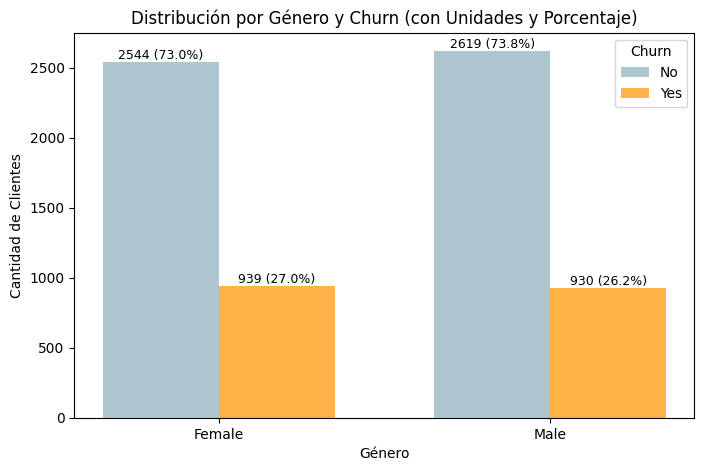

In [30]:
### valido
import matplotlib.pyplot as plt
import numpy as np

counts = df_normalizado.groupby(['customer.gender', 'Churn']).size().reset_index(name='count')
total_per_gender = counts.groupby('customer.gender')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_per_gender * 100
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

genders = counts['customer.gender'].unique()
churn_status = counts['Churn'].unique()
width = 0.35
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

fig, ax = plt.subplots(figsize=(8,5))

positions = np.arange(len(genders))

for i, churn in enumerate(churn_status):
    vals = []
    texts = []
    for gender in genders:
        row = counts[(counts['customer.gender'] == gender) & (counts['Churn'] == churn)]
        if not row.empty:
            vals.append(row['count'].values[0])
            texts.append(row['text'].values[0])
        else:
            vals.append(0)
            texts.append('')
    bars = ax.bar(positions + i*width, vals, width=width, label=str(churn), color=colors[churn])
    # Añadir texto encima de barras
    for bar, label in zip(bars, texts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=9)

ax.set_xticks(positions + width/2)
ax.set_xticklabels(genders)
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de Clientes')
ax.set_title('Distribución por Género y Churn (con Unidades y Porcentaje)')
ax.legend(title='Churn')

plt.show()



###Grafico de fugas por edad > 65 y cantidad + porcentaje

In [20]:
#grafico de fugas por seniocitizen cantidad y porcentaje
import pandas as pd
import plotly.express as p
#px.histogram(df_normalizado, x = 'customer.SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')
import plotly.express as px
import pandas as pd

# Agrupar por SeniorCitizen y Churn
counts = df_normalizado.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Calcular total por grupo de SeniorCitizen
total_per_group = counts.groupby('customer.SeniorCitizen')['count'].transform('sum')

# Calcular porcentaje dentro del grupo
counts['percentage'] = counts['count'] / total_per_group * 100

# Crear texto personalizado con unidades y porcentaje
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

# Reemplazar 0 y 1 por etiquetas más legibles si deseas
counts['customer.SeniorCitizen'] = counts['customer.SeniorCitizen'].replace({0: 'No Senior', 1: 'Senior'})

# Crear gráfico
fig = px.bar(counts,
             x='customer.SeniorCitizen',
             y='count',
             color='Churn',
             text='text',
             barmode='group', color_discrete_sequence=['#AEC6CF', '#FFB347'])

fig.update_traces(textposition='outside')
fig.update_layout(title='Distribución por SeniorCitizen y Churn (Unidades + %)',
                  yaxis_title='Cantidad de Clientes',
                  xaxis_title='¿Es Senior?')

fig.show()


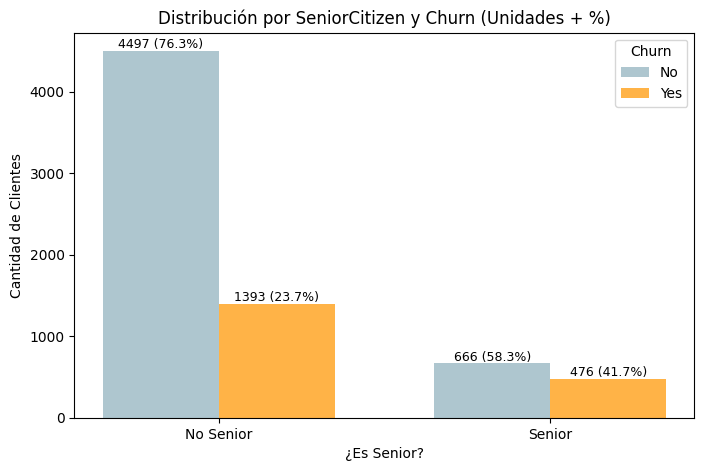

In [31]:
#Valido
import matplotlib.pyplot as plt
import numpy as np

# Agrupar y calcular
counts = df_normalizado.groupby(['customer.SeniorCitizen', 'Churn']).size().reset_index(name='count')
total_per_group = counts.groupby('customer.SeniorCitizen')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_per_group * 100
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)
counts['customer.SeniorCitizen'] = counts['customer.SeniorCitizen'].replace({0: 'No Senior', 1: 'Senior'})

# Preparar datos
categories = counts['customer.SeniorCitizen'].unique()
churn_status = counts['Churn'].unique()
width = 0.35
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

fig, ax = plt.subplots(figsize=(8,5))
positions = np.arange(len(categories))

for i, churn in enumerate(churn_status):
    vals = []
    texts = []
    for category in categories:
        row = counts[(counts['customer.SeniorCitizen'] == category) & (counts['Churn'] == churn)]
        if not row.empty:
            vals.append(row['count'].values[0])
            texts.append(row['text'].values[0])
        else:
            vals.append(0)
            texts.append('')
    bars = ax.bar(positions + i*width, vals, width=width, label=str(churn), color=colors[churn])
    for bar, label in zip(bars, texts):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, label, ha='center', va='bottom', fontsize=9)

ax.set_xticks(positions + width/2)
ax.set_xticklabels(categories)
ax.set_xlabel('¿Es Senior?')
ax.set_ylabel('Cantidad de Clientes')
ax.set_title('Distribución por SeniorCitizen y Churn (Unidades + %)')
ax.legend(title='Churn')

plt.show()


In [21]:
px.histogram(df_normalizado, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group', color_discrete_sequence=['#AEC6CF', '#FFB347'])


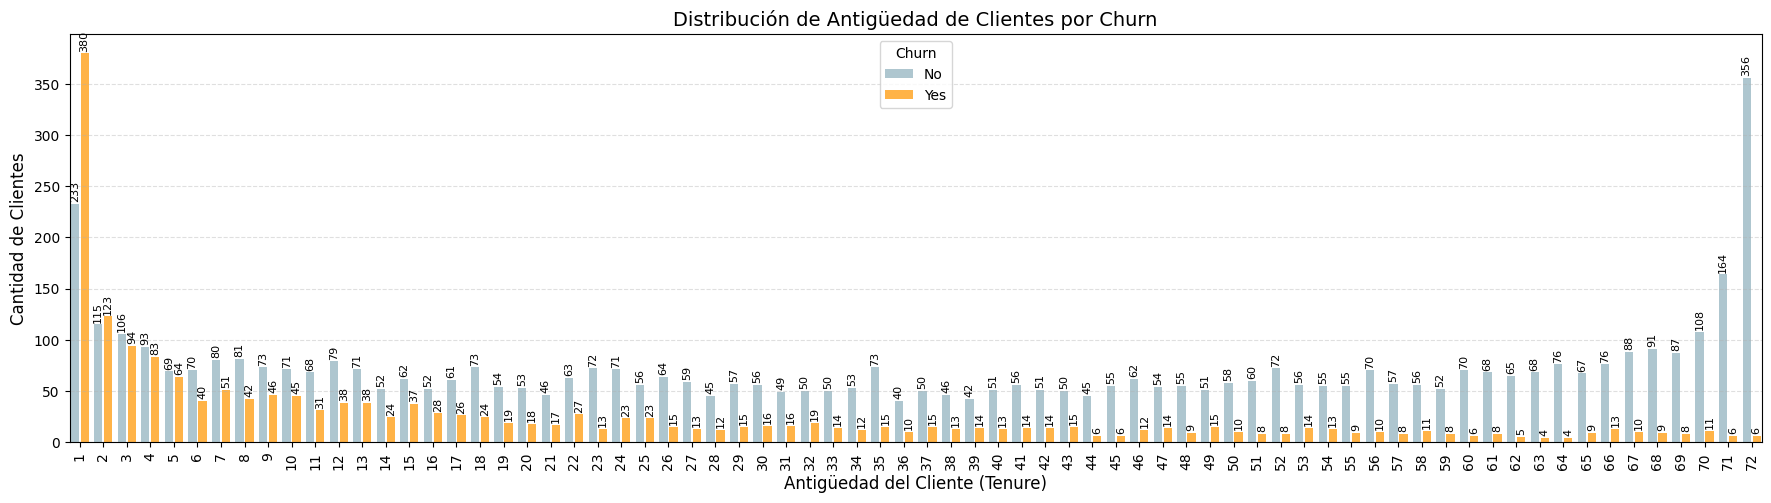

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos
bins = sorted(df_normalizado['customer.tenure'].unique())
churn_values = ['No', 'Yes']
colors = {'No': '#AEC6CF', 'Yes': '#FFB347'}

# Calcular histogramas por cada valor de Churn
data_churn = {churn: df_normalizado[df_normalizado['Churn'] == churn]['customer.tenure'] for churn in churn_values}
counts_churn = {
    churn: np.histogram(data_churn[churn], bins=np.arange(min(bins) - 0.5, max(bins) + 1.5))[0]
    for churn in churn_values
}

# Posiciones para barras agrupadas
x = np.array(bins)
bar_width = 0.35
group_spacing = 0.15  # separación entre grupos
total_width = 2 * bar_width + group_spacing

fig, ax = plt.subplots(figsize=(18, 6))

for i, churn in enumerate(churn_values):
    offset = (i - 0.5) * (bar_width + group_spacing / 2)
    positions = x + offset
    bars = ax.bar(positions, counts_churn[churn], width=bar_width, color=colors[churn], label=churn)

    # Etiquetas sobre las barras
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}',
                    ha='center', va='bottom', fontsize=8, rotation=90)

# Títulos y etiquetas
ax.set_title('Distribución de Antigüedad de Clientes por Churn', fontsize=14)
ax.set_xlabel('Antigüedad del Cliente (Tenure)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90)

# Márgenes ajustados
ax.set_xlim(x[0] - total_width / 2, x[-1] + total_width / 2)
plt.subplots_adjust(left=0.05, right=0.99, bottom=0.2, top=0.88)

# Grilla
ax.grid(axis='y', linestyle='--', alpha=0.4)

# Leyenda
ax.legend(title='Churn')

plt.show()


###Visualizando en que mes de permanencia se produce mayor porcentaje de fuga

In [22]:
# Grafico de % de fugas - Agrupa por tenure y Churn
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular la tasa de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Resetear índice para graficar
df_churn_rate = df_grouped.reset_index()

# Crear gráfico de línea con Plotly
fig = px.line(df_churn_rate,
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Mes de Permanencia',
              labels={
                  'customer.tenure': 'Meses de Permanencia',
                  'churn_rate': 'Tasa de Churn (%)'
              })

fig.update_layout(yaxis_range=[0, 100])  # Ajusta el eje Y de 0 a 100%
fig.show()


### Promedio de Cargas mensuales por permanencia y fuga

In [23]:
# Agrupar y calcular promedio
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn'])['account.Charges.Monthly'].mean().reset_index()

fig = px.line(df_grouped, x='customer.tenure', y='account.Charges.Monthly', color='Churn',
              title='Promedio de cargos mensuales por tenure y Churn')
fig.show()


###Distribucion de Fugas por tipos de contrato

In [24]:
import pandas as pd
import plotly.express as px

# Calcular conteos por contrato y churn
counts = df_normalizado.groupby(['account.Contract', 'Churn']).size().reset_index(name='count')

# Calcular total por contrato para porcentaje
total_per_contract = counts.groupby('account.Contract')['count'].transform('sum')

# Calcular porcentaje dentro de cada contrato
counts['percentage'] = counts['count'] / total_per_contract * 100

# Crear texto para mostrar unidades y porcentaje
counts['text'] = counts.apply(lambda row: f"{row['count']} ({row['percentage']:.1f}%)", axis=1)

# Gráfico de barras con porcentaje y unidades
fig = px.bar(counts,
             x='account.Contract',
             y='count',
             color='Churn',
             text='text',
             barmode='group',
             color_discrete_sequence=['#AEC6CF', '#FFB347'])

fig.update_traces(textposition='outside')
fig.update_layout(title='Distribución de Churn por Tipo de Contrato (Unidades y %)',
                  yaxis_title='Cantidad de Clientes',
                  xaxis_title='Tipo de Contrato')

fig.show()


###Distribucion de Carga Mensual de clientes por Churn

In [25]:
import pandas as pd
import plotly.express as px

# Agrupar por Churn y calcular promedio y conteo
df_resumen = df_normalizado.groupby('Churn').agg(
    Promedio_Cargos=('account.Charges.Monthly', 'mean'),
    Cantidad_Clientes=('account.Charges.Monthly', 'count')
).reset_index()

# Redondear valores
df_resumen['Promedio_Cargos'] = df_resumen['Promedio_Cargos'].round(2)

# Texto a mostrar: promedio + cantidad
df_resumen['Texto'] = df_resumen.apply(
    lambda row: f"${row['Promedio_Cargos']} ({row['Cantidad_Clientes']} clientes)", axis=1
)

# Gráfico de barras
fig = px.bar(df_resumen,
             x='Churn',
             y='Promedio_Cargos',
             text='Texto',
             color='Churn',
             title='Promedio de Cargos Mensuales y Cantidad de Clientes por Churn', color_discrete_sequence=['#AEC6CF', '#FFB347'])

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Promedio de Cargos Mensuales ($)')
fig.show()


In [26]:
#px.histogram(df_normalizado, x = 'internet.InternetService',  text_auto = True, color = 'Churn', barmode = 'group',color_discrete_sequence=['#AEC6CF', '#FFB347'])

import pandas as pd
import plotly.express as px

# Agrupar por InternetService y Churn
df_grouped = df_normalizado.groupby(['internet.InternetService', 'Churn']).size().reset_index(name='Cantidad')

# Calcular el total por categoría de InternetService
total_por_categoria = df_grouped.groupby('internet.InternetService')['Cantidad'].transform('sum')

# Calcular el porcentaje dentro de cada grupo
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)

# Crear etiqueta de texto con unidades y %
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Crear el gráfico
fig = px.bar(df_grouped,
             x='internet.InternetService',
             y='Cantidad',
             color='Churn',
             text='Texto',
             barmode='group',
             color_discrete_sequence=['#AEC6CF', '#FFB347'],
             title='Distribución de Churn según tipo de Servicio de Internet')

# Ajustes visuales
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Tipo de Servicio de Internet',
                  yaxis_title='Cantidad de Clientes')

fig.show()


In [27]:
import pandas as pd
import plotly.express as px

# Agrupar por PhoneService y Churn
df_grouped = df_normalizado.groupby(['phone.PhoneService', 'Churn']).size().reset_index(name='Cantidad')

# Calcular total por categoría de PhoneService
total_por_categoria = df_grouped.groupby('phone.PhoneService')['Cantidad'].transform('sum')

# Calcular porcentaje dentro de cada grupo
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)

# Crear texto combinado para cada barra
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Crear gráfico con colores pastel
fig = px.bar(df_grouped,
             x='phone.PhoneService',
             y='Cantidad',
             color='Churn',
             text='Texto',
             barmode='group',
             color_discrete_sequence=['#AEC6CF', '#FFB347'],  # pastel azul y durazno
             title='Churn según Servicio Telefónico')

# Ajustes estéticos
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Servicio Telefónico',
                  yaxis_title='Cantidad de Clientes')

fig.show()


In [28]:
import pandas as pd
import plotly.express as px

# Agrupar por StreamingTV y Churn
df_grouped = df_normalizado.groupby(['internet.StreamingTV', 'Churn']).size().reset_index(name='Cantidad')

# Calcular total por categoría de StreamingTV
total_por_categoria = df_grouped.groupby('internet.StreamingTV')['Cantidad'].transform('sum')

# Calcular el porcentaje
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)

# Texto con unidades y porcentaje
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Crear gráfico con colores pastel
fig = px.bar(df_grouped,
             x='internet.StreamingTV',
             y='Cantidad',
             color='Churn',
             text='Texto',
             barmode='group',
             color_discrete_sequence=['#AEC6CF', '#FFB347'],  # pastel azul y durazno
             title='Churn según uso de Streaming TV')

# Ajustes visuales
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Uso de Streaming TV',
                  yaxis_title='Cantidad de Clientes')

fig.show()


In [29]:
# Agrupar por PaymentMethod y Churn
df_grouped = df_normalizado.groupby(['account.PaymentMethod', 'Churn']).size().reset_index(name='Cantidad')

# Calcular total por método de pago
total_por_categoria = df_grouped.groupby('account.PaymentMethod')['Cantidad'].transform('sum')

# Calcular el porcentaje por grupo
df_grouped['Porcentaje'] = (df_grouped['Cantidad'] / total_por_categoria * 100).round(1)

# Crear etiqueta de texto con unidades + porcentaje
df_grouped['Texto'] = df_grouped.apply(lambda row: f"{row['Cantidad']} ({row['Porcentaje']}%)", axis=1)

# Crear gráfico con colores pastel
fig = px.bar(df_grouped,
             x='account.PaymentMethod',
             y='Cantidad',
             color='Churn',
             text='Texto',
             barmode='group',
             color_discrete_sequence=['#AEC6CF', '#FFB347'],
             title='Churn según Método de Pago')

# Ajustes estéticos
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Método de Pago',
                  yaxis_title='Cantidad de Clientes',
                  xaxis_tickangle=-20)

fig.show()


#📄Informe final

##📊 Gráficos seleccionados y su interpretación
###1. Churn por Tipo de Contrato
Qué muestra: cuántos clientes se van (Yes) o permanecen (No) según el tipo de contrato: Month-to-month, One year, Two year.

Qué se observa (basado en tendencias típicas):

El churn es más alto en contratos mes a mes, lo que indica menor compromiso.

Contratos de 1 o 2 años tienen menor churn.

✅ Conclusión: Clientes sin permanencia son más propensos a irse.

###2. Churn por Servicio de Internet
Qué muestra: la relación entre el tipo de conexión (DSL, Fiber optic, No) y la tasa de abandono.

Qué se observa usualmente:

Fiber optic tiene mayor churn que DSL.

Quienes no tienen Internet casi no presentan churn (probablemente usan otros servicios).

✅ Conclusión: Clientes con fibra óptica podrían estar más insatisfechos, tal vez por el precio o problemas técnicos.

###3. Churn por Género
Qué muestra: comparación simple entre hombres y mujeres.

Qué se observa usualmente:

La diferencia entre géneros suele ser mínima.

No es un factor determinante por sí solo.

✅ Conclusión: El género no parece influir significativamente en la evasión.

###4. Precio Diario vs Churn (Boxplot)
Qué muestra: cuánto pagan por día en promedio los que se quedan vs los que se van.

Qué se suele observar:

Clientes con churn pagan ligeramente más por día.

Hay mayor dispersión entre los que se van.

##✅ Conclusión: Un precio más alto diario puede influir en la fuga, especialmente si no se justifica con el servicio recibido.

📝 Informe: Análisis de Fuga de Clientes y Recomendaciones
🎯 Problema:
La empresa enfrenta una tasa significativa de churn, especialmente en ciertos perfiles de clientes.

🔍 Principales hallazgos:
Clientes con contrato mes a mes tienen mayor probabilidad de irse.

Clientes con fibra óptica presentan más abandono que DSL.

Precio diario más alto está asociado a mayor churn.

Género no es un factor determinante.

##✅ Recomendaciones para reducir la fuga:
Incentivar contratos a largo plazo con descuentos u ofertas exclusivas.

Revisar la calidad y atención de fibra óptica: puede estar generando insatisfacción.

Segmentar clientes con precios altos y ofrecerles beneficios tangibles o ajustes.

Implementar encuestas post-servicio para entender causas reales del abandono.

Crear campañas de fidelización para clientes en riesgo (mes a mes + precio alto).

